# Gradient Descent

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data=pd.DataFrame([[0.5,1.4],[2.3,1.9],[2.9,3.2]],columns=['Weight','Height'])
data

,Weight,Height
0,0.5,1.4
1,2.3,1.9
2,2.9,3.2


##### pred_Height= b1*Weight + b0
Therfore building the regression model is nothing but finding/optimising these coefficients.
Lets start with freezing one coefficient b1=0.64 and computing other one 'b0'

The idea of finding these coefficient is:
Compute the value for b0 and b1 such that the error is minimum.

What is error ? sum((Actual Height - Pred_Height)^2)

sum((Actual Height - (b1*Weight + b0) )^2)  --> 0

## Gradient descent workout for tuning both b0 and b1

In [42]:
b0=np.linspace(-10,10,30)
b1=np.linspace(-10,10,30)

In [44]:
sser=[]
sser1=[]
for i in b1:
    sser=[]
    for j in b0:
        H_pred=i*data['Weight']+j
        er=H_pred-data['Height']
        ser=np.power(er,2)
        #mse=np.mean(ser)
        sser.append(np.sum(ser))
        sser_ar=np.array(sser)
    sser1.append(sser)

In [49]:
#sser1=np.array(sser1)
#sser1.shape

In [50]:
B0, B1 = np.meshgrid(b0, b1)
sser1=np.array(sser1)
print(sser1.shape)
print(B0.shape)
print(B1.shape)

(30, 30)
(30, 30)
(30, 30)


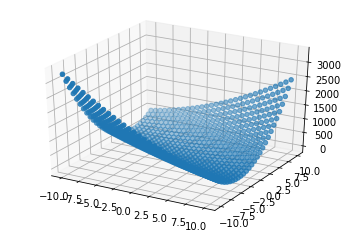

In [51]:
from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection='3d')
ax.scatter3D(B0,B1,sser1)
#ax.scatter()

In [52]:
xmin,ymin=np.where(sser1==np.min(sser1))
xmax,ymax=np.where(sser1==np.max(sser1))

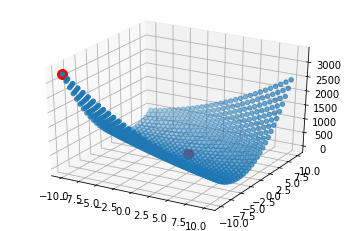

In [53]:
ax = plt.axes(projection='3d')
ax.scatter3D(B0,B1,sser1)
ax.scatter3D(b0[xmin],b1[ymin],np.min(sser1),color='red',s=100)
ax.scatter3D(b0[xmax],b1[ymax],np.max(sser1),color='red',s=100)

In [4]:
b0=0
b1=1
ssser=1
alpha=0.01
itr=0

sse = sum (actual_Height - pred_Height)^2
   
    = sum (data['Height'] - b1*data['Weight']- b0) ^2
    
dsse w.r.t to both b0 and b1

dsse_b0 = sum 2(data['Height'] - b1*data['Weight']- b0)(-1)

        =sum -2(data['Height'] - b1*data['Weight']- b0)
        
        = sum -2(data['Height'] - (b1*data['Weight']+ b0))
    
dsse_b1 = sum 2(data['Height'] - b1*data['Weight']- b0)(data['Weight']]

        =sum -2*data['weight']((data['Height'] - b1*data['Weight']-b0))
        
        = sum -2*data['weight']((data['Height'] - (b1*data['Weight']+b0)))
        
step_size_b0=dsse_b0*aplha

step_size_b1=dsse_b1*alpha

new_b0=previou_b0-step_size_b0

new_b1=previou_b1-step_size_b1

In [5]:
while (ssser>0.1):
    dsse_b0=np.sum(-2*(data['Height']-(b1*data['Weight']+b0)))
    dsse_b1=np.sum(-2*data['Weight']*(data['Height']-(b1*data['Weight']+b0)))
    step_size_b0=dsse_b0*alpha
    step_size_b1=dsse_b1*alpha
    b0=b0-step_size_b0
    b1=b1-step_size_b1
    H_pred=b1*data['Weight']+b0
    er=H_pred-data['Height']
    ser=np.power(er,2)
    sser=np.mean(ser)
    ssser=np.sqrt(sser)
    itr=itr+1
    print('The RMSE error',ssser)
    #print('The rate of change of error',dsse_b1)
    print('The feature coefficeint',b1)
    print('The intercept coefficeint',b0)
    print('Iteration: ',itr)
    if itr>1000:
        break
        

The RMSE error 0.5862650140223845
The feature coefficeint 1.008
The intercept coefficeint 0.016000000000000007
Iteration:  1
The RMSE error 0.5805329335429644
The feature coefficeint 1.011944
The intercept coefficeint 0.030128000000000005
Iteration:  2
The RMSE error 0.5759444918650682
The feature coefficeint 1.013177032
The intercept coefficeint 0.042958704000000014
Iteration:  3
The RMSE error 0.5719110736860559
The feature coefficeint 1.012603347816
The intercept coefficeint 0.05487900011200002
Iteration:  4
The RMSE error 0.5681629546305675
The feature coefficeint 1.010830807762568
The intercept coefficeint 0.06614947845425603
Iteration:  5
The RMSE error 0.5645766683990016
The feature coefficeint 1.0082679718530265
The intercept coefficeint 0.07694579766206792
Iteration:  6
The RMSE error 0.5610955531408411
The feature coefficeint 1.0051893867725563
The intercept coefficeint 0.08738650101109884
Iteration:  7
The RMSE error 0.557693402742464
The feature coefficeint 1.00177948674774

The RMSE error 0.4328314217556472
The feature coefficeint 0.8186916733933431
The intercept coefficeint 0.5317164523590949
Iteration:  70
The RMSE error 0.4318026062823392
The feature coefficeint 0.8166610209476636
The intercept coefficeint 0.5364826144507081
Iteration:  71
The RMSE error 0.4307948004578728
The feature coefficeint 0.8146535780558848
The intercept coefficeint 0.5411943011956319
Iteration:  72
The RMSE error 0.4298076174949458
The feature coefficeint 0.8126690794419908
The intercept coefficeint 0.5458521352255231
Iteration:  73
The RMSE error 0.42884067620951205
The feature coefficeint 0.8107072628619658
The intercept coefficeint 0.5504567320556047
Iteration:  74
The RMSE error 0.42789360099007007
The feature coefficeint 0.8087678690691384
The intercept coefficeint 0.5550087001660043
Iteration:  75
The RMSE error 0.4269660217655306
The feature coefficeint 0.8068506417799244
The intercept coefficeint 0.5595086410821624
Iteration:  76
The RMSE error 0.42605757397169985
The 

The RMSE error 0.39728186593238907
The feature coefficeint 0.7291443338178074
The intercept coefficeint 0.741893795210306
Iteration:  131
The RMSE error 0.3970063676053204
The feature coefficeint 0.7281371720286642
The intercept coefficeint 0.7442577134424576
Iteration:  132
The RMSE error 0.3967369461259633
The feature coefficeint 0.7271415217002267
The intercept coefficeint 0.7465946130246425
Iteration:  133
The RMSE error 0.39647347132293836
The feature coefficeint 0.7261572512610542
The intercept coefficeint 0.7489048027693381
Iteration:  134
The RMSE error 0.39621581564920555
The feature coefficeint 0.7251842306435156
The intercept coefficeint 0.7511885879594177
Iteration:  135
The RMSE error 0.39596385413601026
The feature coefficeint 0.7242223312666011
The intercept coefficeint 0.7534462703884919
Iteration:  136
The RMSE error 0.3957174643473525
The feature coefficeint 0.7232714260189314
The intercept coefficeint 0.7556781484007898
Iteration:  137
The RMSE error 0.39547652633498

The RMSE error 0.387355505775323
The feature coefficeint 0.6795393456799361
The intercept coefficeint 0.8583220961335798
Iteration:  203
The RMSE error 0.3873015445110091
The feature coefficeint 0.6790991492760059
The intercept coefficeint 0.8593552849580522
Iteration:  204
The RMSE error 0.3872488024443826
The feature coefficeint 0.6786639841427823
The intercept coefficeint 0.8603766648431045
Iteration:  205
The RMSE error 0.38719725218846957
The feature coefficeint 0.6782337927748321
The intercept coefficeint 0.861386370760241
Iteration:  206
The RMSE error 0.387146866964406
The feature coefficeint 0.6778085183239865
The intercept coefficeint 0.8623845361382957
Iteration:  207
The RMSE error 0.3870976205882476
The feature coefficeint 0.6773881045918285
The intercept coefficeint 0.8633712928810635
Iteration:  208
The RMSE error 0.38704948745805495
The feature coefficeint 0.6769724960222672
The intercept coefficeint 0.8643467713847313
Iteration:  209
The RMSE error 0.3870024425412427
T

The RMSE error 0.3853283681595266
The feature coefficeint 0.6558592269960635
The intercept coefficeint 0.9139019095257719
Iteration:  286
The RMSE error 0.38532032184759984
The feature coefficeint 0.6556896849782238
The intercept coefficeint 0.9142998430766743
Iteration:  287
The RMSE error 0.3853124582545164
The feature coefficeint 0.6555220807585584
The intercept coefficeint 0.9146932284045564
Iteration:  288
The RMSE error 0.38530477323462414
The feature coefficeint 0.6553563921888013
The intercept coefficeint 0.9150821174938073
Iteration:  289
The RMSE error 0.38529726273616843
The feature coefficeint 0.6551925973738317
The intercept coefficeint 0.9154665617346556
Iteration:  290
The RMSE error 0.3852899227991738
The feature coefficeint 0.655030674668782
The intercept coefficeint 0.9158466119299594
Iteration:  291
The RMSE error 0.38528274955337044
The feature coefficeint 0.6548706026761765
The intercept coefficeint 0.9162223183019207
Iteration:  292
The RMSE error 0.38527573921616

The RMSE error 0.38504187402591367
The feature coefficeint 0.6475089004899682
The intercept coefficeint 0.9335010338024895
Iteration:  358
The RMSE error 0.38504033583331254
The feature coefficeint 0.6474347993997833
The intercept coefficeint 0.9336749571184837
Iteration:  359
The RMSE error 0.38503883259569704
The feature coefficeint 0.6473615452557366
The intercept coefficeint 0.9338468925597994
Iteration:  360
The RMSE error 0.3850373635188568
The feature coefficeint 0.647289128377569
The intercept coefficeint 0.9340168628470574
Iteration:  361
The RMSE error 0.3850359278266208
The feature coefficeint 0.6472175391956627
The intercept coefficeint 0.9341848904411911
Iteration:  362
The RMSE error 0.3850345247604478
The feature coefficeint 0.647146768249777
The intercept coefficeint 0.9343509975464142
Iteration:  363
The RMSE error 0.38503315357902695
The feature coefficeint 0.6470768061877981
The intercept coefficeint 0.9345152061131548
Iteration:  364
The RMSE error 0.385031813557884

The RMSE error 0.3849837812146571
The feature coefficeint 0.6434659199066552
The intercept coefficeint 0.942990348842191
Iteration:  443
The RMSE error 0.3849835632592641
The feature coefficeint 0.6434380284846887
The intercept coefficeint 0.9430558130423009
Iteration:  444
The RMSE error 0.3849833502575668
The feature coefficeint 0.6434104558506383
The intercept coefficeint 0.9431205290125083
Iteration:  445
The RMSE error 0.3849831420969801
The feature coefficeint 0.6433831983608843
The intercept coefficeint 0.943184505304785
Iteration:  446
The RMSE error 0.3849829386674782
The feature coefficeint 0.6433562524134521
The intercept coefficeint 0.9432477503733572
Iteration:  447
The RMSE error 0.3849827398615342
The feature coefficeint 0.6433296144475362
The intercept coefficeint 0.9433102725758222
Iteration:  448
The RMSE error 0.3849825455740666
The feature coefficeint 0.6433032809430299
The intercept coefficeint 0.9433720801742538
Iteration:  449
The RMSE error 0.38498235570238104
T

The RMSE error 0.38497644461629404
The feature coefficeint 0.6422084600604872
The intercept coefficeint 0.9459417438301645
Iteration:  506
The RMSE error 0.384976393408804
The feature coefficeint 0.6421949409069725
The intercept coefficeint 0.945973474753459
Iteration:  507
The RMSE error 0.38497634336518055
The feature coefficeint 0.6421815762720329
The intercept coefficeint 0.9460048430048567
Iteration:  508
The RMSE error 0.384976294458971
The feature coefficeint 0.642168364389582
The intercept coefficeint 0.9460358527295535
Iteration:  509
The RMSE error 0.3849762466643239
The feature coefficeint 0.6421553035137195
The intercept coefficeint 0.946066508025368
Iteration:  510
The RMSE error 0.38497619995597493
The feature coefficeint 0.6421423919184999
The intercept coefficeint 0.9460968129432819
Iteration:  511
The RMSE error 0.38497615430923493
The feature coefficeint 0.6421296278977042
The intercept coefficeint 0.946126771487976
Iteration:  512
The RMSE error 0.3849761096999745
Th

The RMSE error 0.38497469714464355
The feature coefficeint 0.6415859303528648
The intercept coefficeint 0.9474028887442865
Iteration:  571
The RMSE error 0.384974685654551
The feature coefficeint 0.6415795264675669
The intercept coefficeint 0.9474179193594027
Iteration:  572
The RMSE error 0.38497467442561145
The feature coefficeint 0.6415731957761438
The intercept coefficeint 0.9474327781805358
Iteration:  573
The RMSE error 0.38497466345188935
The feature coefficeint 0.6415669374420185
The intercept coefficeint 0.9474474671712233
Iteration:  574
The RMSE error 0.384974652727584
The feature coefficeint 0.641560750638176
The intercept coefficeint 0.9474619882725598
Iteration:  575
The RMSE error 0.3849746422470266
The feature coefficeint 0.6415546345470531
The intercept coefficeint 0.9474763434034541
Iteration:  576
The RMSE error 0.3849746320046771
The feature coefficeint 0.6415485883604315
The intercept coefficeint 0.9474905344608828
Iteration:  577
The RMSE error 0.3849746219951213


The RMSE error 0.38497431314219793
The feature coefficeint 0.6413003567968477
The intercept coefficeint 0.9480731609318993
Iteration:  633
The RMSE error 0.38497431037992563
The feature coefficeint 0.6412972169042908
The intercept coefficeint 0.9480805306011447
Iteration:  634
The RMSE error 0.3849743076804362
The feature coefficeint 0.6412941128994631
The intercept coefficeint 0.9480878160379869
Iteration:  635
The RMSE error 0.3849743050423025
The feature coefficeint 0.6412910443721824
The intercept coefficeint 0.9480950182051688
Iteration:  636
The RMSE error 0.38497430246412906
The feature coefficeint 0.6412880109169543
The intercept coefficeint 0.9481021380544299
Iteration:  637
The RMSE error 0.3849742999445544
The feature coefficeint 0.6412850121329191
The intercept coefficeint 0.9481091765266313
Iteration:  638
The RMSE error 0.38497429748224604
The feature coefficeint 0.6412820476237987
The intercept coefficeint 0.9481161345518806
Iteration:  639
The RMSE error 0.3849742950759

The RMSE error 0.38497420695754214
The feature coefficeint 0.6411232675110405
The intercept coefficeint 0.9484888087413684
Iteration:  723
The RMSE error 0.3849742066086954
The feature coefficeint 0.6411221516789443
The intercept coefficeint 0.9484914277206277
Iteration:  724
The RMSE error 0.38497420626777734
The feature coefficeint 0.6411210486003672
The intercept coefficeint 0.9484940167659903
Iteration:  725
The RMSE error 0.38497420593460796
The feature coefficeint 0.6411199581295419
The intercept coefficeint 0.948496576219589
Iteration:  726
The RMSE error 0.3849742056090109
The feature coefficeint 0.6411188801223666
The intercept coefficeint 0.948499106419646
Iteration:  727
The RMSE error 0.3849742052908146
The feature coefficeint 0.6411178144363867
The intercept coefficeint 0.9485016077005174
Iteration:  728
The RMSE error 0.3849742049798502
The feature coefficeint 0.6411167609307759
The intercept coefficeint 0.9485040803927383
Iteration:  729
The RMSE error 0.3849742046759535

The RMSE error 0.384974194222726
The feature coefficeint 0.6410659269105761
The intercept coefficeint 0.948623393365549
Iteration:  800
The RMSE error 0.38497419416332346
The feature coefficeint 0.6410654664588528
The intercept coefficeint 0.9486244740958104
Iteration:  801
The RMSE error 0.38497419410527095
The feature coefficeint 0.6410650112699104
The intercept coefficeint 0.9486255424737525
Iteration:  802
The RMSE error 0.38497419404853794
The feature coefficeint 0.6410645612835977
The intercept coefficeint 0.9486265986405575
Iteration:  803
The RMSE error 0.38497419399309446
The feature coefficeint 0.6410641164404504
The intercept coefficeint 0.9486276427357939
Iteration:  804
The RMSE error 0.38497419393891114
The feature coefficeint 0.6410636766816842
The intercept coefficeint 0.948628674897435
Iteration:  805
The RMSE error 0.38497419388595927
The feature coefficeint 0.6410632419491867
The intercept coefficeint 0.9486296952618769
Iteration:  806
The RMSE error 0.38497419383421

The RMSE error 0.3849741919710225
The feature coefficeint 0.6410406311959602
The intercept coefficeint 0.948682765158264
Iteration:  886
The RMSE error 0.38497419196279786
The feature coefficeint 0.6410404598642452
The intercept coefficeint 0.9486831672924287
Iteration:  887
The RMSE error 0.3849741919547604
The feature coefficeint 0.6410402904907839
The intercept coefficeint 0.9486835648303591
Iteration:  888
The RMSE error 0.3849741919469053
The feature coefficeint 0.6410401230531942
The intercept coefficeint 0.9486839578245881
Iteration:  889
The RMSE error 0.3849741919392289
The feature coefficeint 0.6410399575293501
The intercept coefficeint 0.9486843463270487
Iteration:  890
The RMSE error 0.384974191931727
The feature coefficeint 0.6410397938973779
The intercept coefficeint 0.9486847303890799
Iteration:  891
The RMSE error 0.3849741919243955
The feature coefficeint 0.6410396321356543
The intercept coefficeint 0.948685110061434
Iteration:  892
The RMSE error 0.38497419191723076
T

The RMSE error 0.384974191684946
The feature coefficeint 0.6410325010145622
The intercept coefficeint 0.9487018475780347
Iteration:  954
The RMSE error 0.3849741916832235
The feature coefficeint 0.6410324226076034
The intercept coefficeint 0.9487020316076925
Iteration:  955
The RMSE error 0.38497419168154023
The feature coefficeint 0.6410323450968052
The intercept coefficeint 0.9487022135339642
Iteration:  956
The RMSE error 0.3849741916798953
The feature coefficeint 0.6410322684719246
The intercept coefficeint 0.9487023933808906
Iteration:  957
The RMSE error 0.3849741916782876
The feature coefficeint 0.6410321927228362
The intercept coefficeint 0.9487025711722378
Iteration:  958
The RMSE error 0.38497419167671626
The feature coefficeint 0.6410321178395298
The intercept coefficeint 0.9487027469315001
Iteration:  959
The RMSE error 0.38497419167518104
The feature coefficeint 0.64103204381211
The intercept coefficeint 0.9487029206819038
Iteration:  960
The RMSE error 0.3849741916736804


In [35]:
print('The tuned Coefficient b1: ', b1)
print('The tuned intercept b0: ', b0)

The tuned Coefficient b1:  0.6410296375332744
The tuned intercept b0:  0.9487085684799762


In [37]:
inp=data['Weight'].values.reshape(-1,1)

In [39]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(inp,data['Height'])
ypred=lr.predict(inp)

In [41]:
lr.coef_, lr.intercept_

(array([0.64102564]), 0.9487179487179489)

In [55]:
import statsmodels.api as sm

In [56]:
inpc=sm.add_constant(inp)
ols=sm.OLS(data['Height'],inpc)
ols_mod=ols.fit()
ols_mod.summary()

C:\Users\senthil kumar\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Height   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     2.884
Date:                Tue, 25 Aug 2020   Prob (F-statistic):              0.339
Time:                        07:58:30   Log-Likelihood:                -1.3931
No. Observations:                   3   AIC:                             6.786
Df Residuals:                       1   BIC:                             4.983
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9487      0.814      1.165      0.451      -9.395      11.292
x1             0.6410      0.377      1.698      0.339      -4.156       5.438
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.846
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.392
Skew:                          -0.470   Prob(JB):                        0.822
Kurtosis:                       1.500   Cond. No.                         5.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""